In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

## settings

In [11]:
# aspect setting
asp_dict = pd.read_pickle('../data/setting/aspect.pkl')    

## functions

In [13]:
def read_result(path,TRound,Graph_type):
    """
    讀取訓練結果，回傳資料框
    
    Parameters:
        path (str): 資料路徑
        TRound (int): 循環總次數
        Graph_type (str): 前處理的textGCN圖的類型
    """

    df = pd.DataFrame()
    for r in range(0,TRound):
        dff = '{0}{1}.csv'.format(path,r)
        df_temp = pd.read_csv(dff)
        df_temp['Round'] = r
        # df = df.append(df_temp)
        df = pd.concat([df, df_temp])
    df['Graph_type'] = Graph_type
    return df

In [14]:
def plot_result(df, score_type, graph_type, TRound, save_f):
    """
    讀取訓練結果，回傳資料框
    
    Parameters:
        df (str): 結果資料框
        score_type (int): 驗證指標
        graph_type (str): 前處理的textGCN圖的類型
        TRound (str): 循環總次數
        save_f (str): 儲存圖的路徑
    """    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(16, 5)

    for r in range(0,TRound):
        df_sel = df[df['Round'] == r]
        x = df_sel['Epoch']
        axs[0].plot(x, df_sel[f'A{score_type}'], label = f"Round{r}")    
        axs[0].legend()
    axs[0].set_title('Axis [0, 0]')

    for r in range(0,TRound):
        df_sel = df[df['Round'] == r]
        x = df_sel['Epoch']
        axs[1].plot(x, df_sel[f'S{score_type}'], label = f"Round{r}")    
        axs[1].legend()

    axs[0].set_title(f'Aspect {score_type}', fontsize=16)
    axs[1].set_title(f'Sentiment {score_type}', fontsize=16)

    for ax in axs.flat:
        ax.set(xlabel='Epoch', ylabel=score_type)

    fig.suptitle(f'{graph_type} Graph', fontsize=18, y=1.05)
    if save_f != None:
        save_f = f'./{pdir}/{model_ver}/performance/original_{model_ver}.png'
        fig.savefig(save_f)

In [15]:
def plot_result2(df, T_list, score_type):
    """
    讀取訓練結果，回傳資料框
    
    Parameters:
        df (str): 結果資料框
        score_type (int): 驗證指標
    """    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(16, 5)

    for r in T_list:
        df_sel = df[df['type'] == r]
        x = df_sel['Epoch']
        axs[0].plot(x, df_sel[f'A{score_type}'], label = f"{r}")    
        axs[0].legend()
    axs[0].set_title('Axis [0, 0]')

    for r in T_list:
        df_sel = df[df['type'] == r]
        x = df_sel['Epoch']
        axs[1].plot(x, df_sel[f'S{score_type}'], label = f"{r}")    
        axs[1].legend()

    axs[0].set_title(f'Aspect {score_type}', fontsize=16)
    axs[1].set_title(f'Sentiment {score_type}', fontsize=16)

    for ax in axs.flat:
        ax.set(xlabel='Epoch', ylabel=score_type)

In [16]:
def get_result(model_ver,n,pdir,Round,graph_type):
    fpath = f'./{pdir}/{model_ver}/performance/{domain}/original/ASSA_R'
    df = read_result(fpath,Round_total,graph_type)
    df['type'] = n
    return df

#### 看三種字典的效果

In [18]:
# pdir = "model_result/history" 
# TList = ['general','manmual','add']
# domain = "FIQA_post"
# Round_total = 1
# df_g = get_result("FIQA_POST_general_0516",TList[0],pdir,Round=1,graph_type='Original')
# df_m = get_result("FIQA_POST_manmual_0516",TList[1],pdir,Round=1,graph_type='Original')
# df_add = get_result("FIQA_POST_manmual_add_0516",TList[2],pdir,Round=1,graph_type='Original')
# df_all = pd.concat([df_g,df_m,df_add])

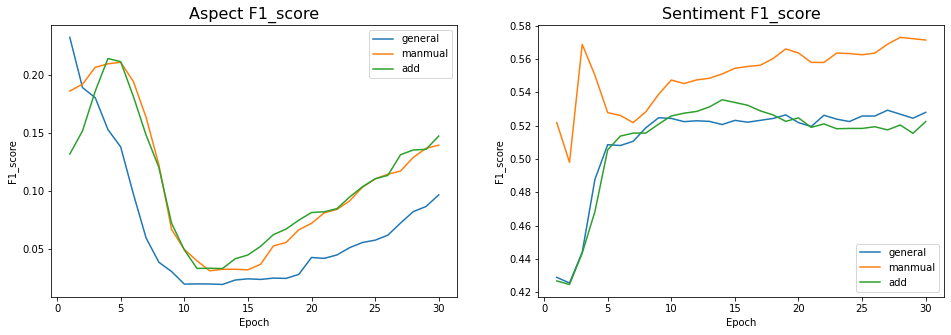

In [8]:
plot_result2(df_all,TList,'F1_score')

#### 看有沒有pre-trained的差別

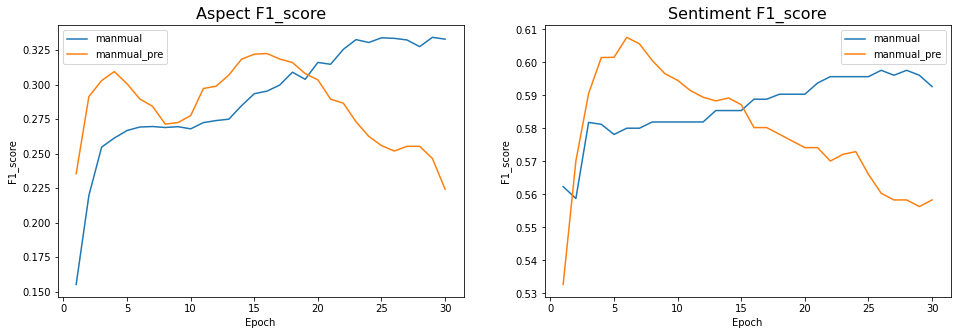

In [43]:
domain = "FIQA_headline"
pdir = "model_result/history" 
TList = ['manmual','manmual_pre']
df_g = get_result("FIQA_headline_manmual",TList[0],pdir,Round=1,graph_type='Original')
df_m = get_result("FIQA_headline_mamual_pre",TList[1],pdir,Round=1,graph_type='Original')
df_all = pd.concat([df_g,df_m])
plot_result2(df_all,TList,'F1_score')

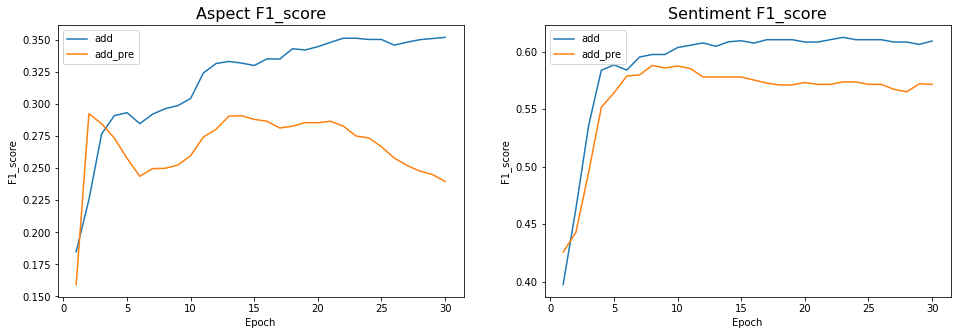

In [19]:
domain = "FIQA_headline"
pdir = "model_result/history" 
TList = ['add','add_pre']
df_g = get_result("FIQA_headline_manmual_add",TList[0],pdir,Round=1,graph_type='Original')
df_m = get_result("FIQA_headline_manmual_add_pre",TList[1],pdir,Round=1,graph_type='Original')
df_all = pd.concat([df_g,df_m])
plot_result2(df_all,TList,'F1_score')

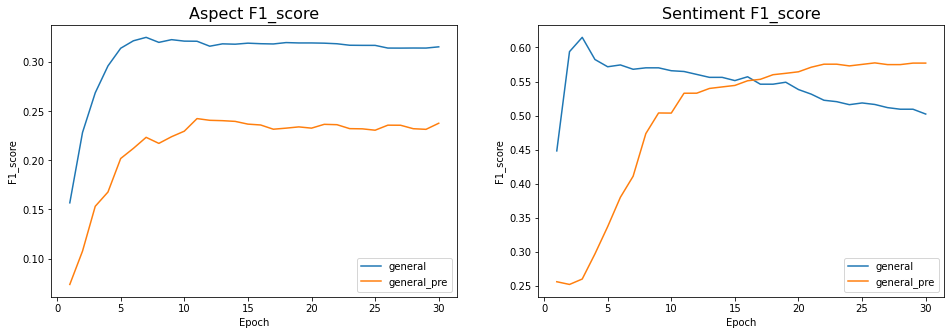

In [16]:
domain = "FIQA_headline"
pdir = "model_result/history" 
TList = ['general','general_pre']
df_g = get_result("FIQA_headline_general",TList[0],pdir,Round=1,graph_type='Original')
df_m = get_result("FIQA_headline_general_pre",TList[1],pdir,Round=1,graph_type='Original')
df_all = pd.concat([df_g,df_m])
plot_result2(df_all,TList,'F1_score')

In [22]:
# 換不同的type看數據
df_all[
    (df_all['type']=='manmual_pre') & (df_all['Epoch']>20)].round(3)

,Epoch,Time,Loss,AAccuracy,APrecision,ARecall,AF1_score,SAccuracy,SPrecision,SRecall,SF1_score,Round,Graph_type,type
20,21,48.294,29.325,0.366,0.530,0.419,0.289,0.592,0.588,0.579,0.574,0,Original,manmual_pre
21,22,48.085,31.136,0.362,0.529,0.414,0.287,0.587,0.584,0.576,0.570,0,Original,manmual_pre
22,23,47.169,28.268,0.345,0.519,0.405,0.273,0.589,0.586,0.577,0.572,0,Original,manmual_pre
23,24,46.978,28.413,0.331,0.512,0.405,0.263,0.589,0.588,0.579,0.573,0,Original,manmual_pre
24,25,46.777,28.184,0.317,0.507,0.404,0.256,0.582,0.581,0.573,0.566,0,Original,manmual_pre
25,26,46.989,31.318,0.315,0.504,0.405,0.252,0.577,0.574,0.566,0.560,0,Original,manmual_pre
26,27,46.462,29.748,0.312,0.513,0.427,0.255,0.575,0.572,0.565,0.558,0,Original,manmual_pre
27,28,15.827,28.587,0.312,0.513,0.427,0.255,0.575,0.572,0.565,0.558,0,Original,manmual_pre
28,29,14.206,28.373,0.300,0.507,0.432,0.247,0.573,0.570,0.563,0.556,0,Original,manmual_pre
29,30,14.038,27.722,0.277,0.493,0.416,0.224,0.575,0.572,0.565,0.558,0,Original,manmual_pre


#### 選定結果類型，看模型效果
+ 驗證指標、總循環次數、模型類型
+ 訓練資料的數據

In [19]:
Score = "F1_score"
Round_total = 5
model_ver = "FIQA_headline_TGCN_addseed" # FIQA_headline_TextGCN_advj
domain = "FIQA_headline"
pdir = "model_result/history" # 
fpath = f'./{pdir}/{model_ver}/performance/{domain}/original/ASSA_R'

original_df = read_result(fpath,Round_total,'Original')
plot_result(original_df,Score,"Original",Round_total, model_ver)

# pngf = f'./{pdir}/{model_ver}/performance/DP_{model_ver}.png'
# DP_df = read_result(fpath,Round_total,'DP')
# plot_result(DP_df,Score,"DP",Round_total, pngf)

# fpath = f'./{pdir}/{model_ver}/performance/REST/DP+/ASSA_R'
# pngf = f'./{pdir}/{model_ver}/performance/DP+_{model_ver}.png'
# DPplus_df = read_result(fpath,Round_total,"DP+")
# plot_result(DPplus_df,Score,"DP+",Round_total, pngf)

FileNotFoundError: [Errno 2] No such file or directory: './model_result/history/FIQA_headline_TGCN_addseed/performance/FIQA_headline/original/ASSA_R0.csv'

In [64]:
# Score = "F1_score"
# Round_total = 1
# model_ver = "0321_1"

# fpath = f'./performance/history/REST_{model_ver}/yelp/ASSA_R'
# pngf = f'./performance/history/REST_{model_ver}/original_{model_ver}.png'
# original_df = read_result(fpath,Round_total,'Original')
# plot_result(original_df,Score,"Original",Round_total, pngf)

# fpath = f'./performance/history/REST_{model_ver}/DP/ASSA_R'
# pngf = f'./performance/history/REST_{model_ver}/DP_{model_ver}.png'
# DP_df = read_result(fpath,Round_total,'DP')
# plot_result(DP_df,Score,"DP",Round_total, pngf)

# fpath = f'./performance/history/REST_{model_ver}/DP+/ASSA_R'
# pngf = f'./performance/history/REST_{model_ver}/DP+_{model_ver}.png'
# DPplus_df = read_result(fpath,Round_total,"DP+")
# plot_result(DPplus_df,Score,"DP+",Round_total, pngf)

## aspect performance

In [57]:
# all_df = pd.concat([original_df,DP_df,DPplus_df])
all_df = pd.concat([original_df])
Adf = all_df[['Epoch','Graph_type','Round','AAccuracy','APrecision','ARecall','AF1_score','Loss']]

Adf[
    (Adf['Epoch'] > 25) #&  (Adf['Epoch'] < 30)
    # (Adf['Epoch'] >15)   
].round(4) 

,Epoch,Graph_type,Round,AAccuracy,APrecision,ARecall,AF1_score,Loss
25,26,Original,0,0.8323,0.7990,0.7164,0.7426,34.3529
26,27,Original,0,0.8311,0.7983,0.7147,0.7408,33.6631
27,28,Original,0,0.8311,0.7983,0.7147,0.7408,33.5794
28,29,Original,0,0.8323,0.7990,0.7156,0.7417,33.6466
29,30,Original,0,0.8323,0.7990,0.7148,0.7408,32.8169
25,26,Original,1,0.8029,0.7603,0.6816,0.6853,31.7323
26,27,Original,1,0.8042,0.7610,0.6828,0.6862,34.3357
27,28,Original,1,0.8042,0.7543,0.6808,0.6834,32.4226
28,29,Original,1,0.8042,0.7543,0.6808,0.6834,31.2111
29,30,Original,1,0.8054,0.7551,0.6820,0.6843,32.0414


## sentiment performance

In [53]:
Sdf = all_df[['Epoch','Graph_type','Round','SAccuracy','SPrecision','SRecall','SF1_score','Loss']]
Sdf[
    (Sdf['Epoch'] > 25) &  (Sdf['Epoch'] < 30)
   
   ].round(4)#[['Epoch','SF1_score']]
# Sdf.round(4)

,Epoch,Graph_type,Round,SAccuracy,SPrecision,SRecall,SF1_score,Loss
25,26,Original,0,0.7980,0.8126,0.7992,0.7961,34.3529
26,27,Original,0,0.7993,0.8141,0.8007,0.7974,33.6631
27,28,Original,0,0.8005,0.8141,0.8006,0.7984,33.5794
28,29,Original,0,0.8005,0.8141,0.8006,0.7984,33.6466
25,26,Original,1,0.7638,0.7768,0.7649,0.7615,31.7323
26,27,Original,1,0.7650,0.7778,0.7659,0.7627,34.3357
27,28,Original,1,0.7638,0.7768,0.7649,0.7615,32.4226
28,29,Original,1,0.7625,0.7757,0.7640,0.7603,31.2111


In [78]:
# a.to_csv('p2.csv', encoding='utf-8', index=False)

## sentiment seed

+ 觀察種子字在不同round之間的變化

In [13]:
def read_seed(fpath,select_general=False):
    fseed_sen = open(fpath, 'r', encoding='utf-8')
    all_seed = []
    for line in fseed_sen: # positive & negative
        seeds_asp_sen = []
        for asp_line in line.split(' | '): # positive or negative
            seeds_sen = []
            for tok in asp_line.split():
                word, weight = tok.split(':')
                seeds_sen.append(word) # word id of seed
            seeds_asp_sen.append(seeds_sen) # seed word (all aspect)
        all_seed.append(seeds_asp_sen)
        
    d = {}
    if select_general:
        p = [l[0] for l in all_seed] # positive
        n = [l[1] for l in all_seed] # negative        
    else:
        p = [l[0][5:] for l in all_seed] # positive
        n = [l[1][5:] for l in all_seed] # negative                
    d['pos'] = p
    d['neg'] = n    
    return d

In [14]:
# seeds from all rounds
def seeds_to_df(path,graph,rounds,aspect_list,select_general):
    dall = {}
    for r in range(1,rounds+1):
        f0 = f'{path}{r}.txt'
        a0 = read_seed(f0,select_general)
        dall[f'R{r}'] = a0
    temp = []
    for r in dall:
        for s in dall[r]:
            for a in dall[r][s]:
                temp.append([r,s,a])
    
    df = pd.DataFrame(data=temp, columns=['round','sentiment','seeds'])      
    df['graph_type'] = graph
    df['aspect'] = np.resize(aspect_list,len(df))
    
    return df

In [15]:
# seeds from all graphs
def get_all_seeds(path,graph_list,rounds,select_general):
    ''' input: all graph type (list), total rounds (int) '''
    ''' output: all sentiment seeds of graphs (dataframe) '''
    
    df = pd.DataFrame()
    for g in graph_list:
        spath = f'{path}{g}/GCN_seed_R'
        temp_df = seeds_to_df(spath,g,rounds,asp_name_list,select_general) # dictionary to dataframe
        df = pd.concat([df, temp_df])
    return df

In [16]:
def arrange_seeds(df):
    l = []
    groupedA = df.groupby(['aspect'])    
    for aspect, groupS in groupedA:    
    #     print("\n",aspect)
        groupedS = groupS.groupby(['sentiment']) 
        for sentiment, groupG in groupedS:
    #         print("\n",sentiment)
            groupedG = groupG.groupby(['graph_type'])
            for graph, groupR in groupedG:
                groupedR = groupR.groupby(['round'])         
                R_temp = []
                R_ntemp = "0"
                for R, groupR in groupedR:                 
                    R_seeds = groupR['seeds'].tolist()[0]
                    R_name = groupR['round'].to_string()[-1]

                    # round_str = f"R{R_ntemp}→R{R_name}"
                    round_str = f"R{R_name}"
                    same = list(set(R_temp) & set(R_seeds))
                    new  = list(set(R_seeds) - set(R_temp))
                    drop = list(set(R_temp) - set(R_seeds))  

                    # append value
                    l.append([aspect,sentiment,graph,round_str,same,new,drop])                
                    # change temp value                 
                    R_temp = R_seeds
                    R_ntemp = R_name                
    return l

In [17]:
def join_list(l):
    return " ".join(l)

In [18]:
t = "delicious:0.1 friendly:0.1 atmosphere:0.1 definitely:0.1 excellent:0.1 | rude:0.1 manager:0.1 mcdonald:0.1 attitude:0.1 employee:0.1 delicious:0.1 friendly:0.1 awesome:0.1 definitely:0.1 excellent:0.1 | manager:0.1 rude:0.1 told:0.1 asked:0.1 worst:0.1 delicious:0.1 atmosphere:0.1 food:0.1 excellent:0.1 friendly:0.1 | rude:0.1 phone:0.1 dirty:0.1 credit:0.1 call:0.1"

In [19]:
t = t.replace(":0.1","")
for i in t.split('|'):
    print(i)
    # for j in i.split(' '):
    #     print(j)

delicious friendly atmosphere definitely excellent 
 rude manager mcdonald attitude employee delicious friendly awesome definitely excellent 
 manager rude told asked worst delicious atmosphere food excellent friendly 
 rude phone dirty credit call


讀取所有的情緒種子字

In [29]:
total_round = 5
seed_l = []
# all_graph = ['yelp','DP','DP+']
all_graph = ['original']
model_ver = 'FIQA_headline_TGCN_addseed'
arg_domain = 'FIQA_headline'

fpath = f'model_result/history/{model_ver}/seed/{arg_domain}/' # 

print(f"model_ver: {model_ver}")

# list of aspect
asp_name_list = asp_dict[arg_domain] 

# get all sentiment seed dataframe
seeds_df = get_all_seeds(fpath,all_graph,total_round,True)
print("seed df shape:",seeds_df.shape)
seed_l = arrange_seeds(seeds_df)

select = seeds_df[seeds_df['round']=='R3'] \
        .sort_values(['aspect','sentiment'], ascending=False)
select['seeds_str'] = select.apply(lambda row: join_list(row['seeds']), axis=1)

select[['seeds_str']]#[['round','aspect','sentiment','seeds_str']]

model_ver: FIQA_headline_TGCN_addseed
seed df shape: (40, 5)


,seeds_str
16,quarter upgrades users history service
20,debt lower gross absolutely bad
18,industry research report stock crashes
22,bad hate disappointed falls lower
19,find save india family take
23,gross bad terrible hate disappointed
17,quarter 'alphabet flotation need event
21,gross bad terrible hate falls


同一領域 > 同一情緒 > 同一圖 > 不同回數比較：重複、不同的有幾個

In [20]:
def join_list(l):
    return " ".join(l)

sdf = pd.DataFrame(data=seed_l, columns=['aspect','sentiment', 'graph_type','round_str', 'same','new', 'drop'])
sdf['all'] = sdf['same'] + sdf['new']
sdf['same'] = sdf.apply(lambda row: join_list(row['same']), axis=1)
sdf['new'] = sdf.apply(lambda row: join_list(row['new']), axis=1)
sdf['drop'] = sdf.apply(lambda row: join_list(row['drop']), axis=1)
sdf['all'] = sdf.apply(lambda row: join_list(row['all']), axis=1)

# sdf[sdf['round_str'] =='R2'][['aspect','sentiment','all']]
sdf[['aspect','sentiment','all']]

,aspect,sentiment,graph_type,round_str,same,new,drop,all
0,CORPORATE,neg,original,R1,,nypost weir woos nickel jardine,,nypost weir woos nickel jardine
1,CORPORATE,pos,original,R1,,millstone punjab mentor llp harp,,millstone punjab mentor llp harp
2,ECONOMY,neg,original,R1,,acsa heated thomas implicated charleston,,acsa heated thomas implicated charleston
3,ECONOMY,pos,original,R1,,brownstones protests vendors nickel abandoned,,brownstones protests vendors nickel abandoned
4,MARKET,neg,original,R1,,nearly hyped funds hedge day,,nearly hyped funds hedge day
5,MARKET,pos,original,R1,,companies traders bonds report industry,,companies traders bonds report industry
6,STOCK,neg,original,R1,,gas janus boycotters accuses antony,,gas janus boycotters accuses antony
7,STOCK,pos,original,R1,,gtb divs item said model,,gtb divs item said model


In [26]:
# sdf.to_csv(f"{fpath}{model_ver}_seeds.csv", index = False)

檢視方法：
+ 觀察同aspect在不同graph_type情況下，同樣情緒seed在各round的變化
小結：
+ R2→R3 會把一些有意義的字篩掉

In [27]:
# "LAPTOP": ["SUPPORT", "OS", "DISPLAY", "BATTERY", "COMPANY", "MOUSE", "SOFTWARE", "KEYBOARD"]

In [22]:
pd.options.display.max_colwidth = 100
sdf[
    # (sdf['aspect'].isin(['SUPPORT','OS'])) &
    (sdf['sentiment']=='neg') &
    (sdf['round_str']=='R2→R3')    
][['aspect','sentiment','round_str','all']] # 'same','new','drop'
sdf[['aspect','sentiment','round_str','all']]

,aspect,sentiment,round_str,all
0,CORPORATE,neg,R1,nypost weir woos nickel jardine
1,CORPORATE,pos,R1,millstone punjab mentor llp harp
2,ECONOMY,neg,R1,acsa heated thomas implicated charleston
3,ECONOMY,pos,R1,brownstones protests vendors nickel abandoned
4,MARKET,neg,R1,nearly hyped funds hedge day
5,MARKET,pos,R1,companies traders bonds report industry
6,STOCK,neg,R1,gas janus boycotters accuses antony
7,STOCK,pos,R1,gtb divs item said model


In [23]:
# "AMB", "DRI", "FOD", "LOC", "SRV"
sdf[
    # (sdf['aspect'] == 'AMB') &
    (sdf['sentiment'] == 'pos') &
    (sdf['round_str'] == 'R3→R4') &
    (sdf['graph_type'] == 'yelp') 
]

,aspect,sentiment,graph_type,round_str,same,new,drop,all


In [21]:
# # "AMB", "DRI", "FOD", "LOC", "SRV"
# sdf[
#     (sdf['aspect'] == 'AMB') &
#     # (sdf['sentiment'] == 'pos') &
#     # (sdf['round_str'] == 'R4→R5') &
#     (sdf['graph_type'] == 'yelp') 
# ][['aspect','sentiment','round_str','all']]

In [65]:
pd.options.display.max_colwidth = 150
sel_df = seeds_df[
    (seeds_df['aspect'] == 'AMB') &
    (seeds_df['sentiment'] == 'neg') &
    (seeds_df['graph_type'] == 'yelp') 
]
sel_df['seeds'] = sel_df.apply(lambda row: join_list(row['seeds']), axis=1)
sel_df

/tmp/ipykernel_7052/409388277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['seeds'] = sel_df.apply(lambda row: join_list(row['seeds']), axis=1)


,round,sentiment,seeds,graph_type,aspect
5,R1,neg,girls,yelp,AMB
15,R2,neg,dance completely,yelp,AMB
25,R3,neg,completely weird dance,yelp,AMB
35,R4,neg,bathroom completely appreciate lack,yelp,AMB
45,R5,neg,bathroom completely floors previous noise,yelp,AMB
55,R6,neg,bathroom floors dirty lack completely previous,yelp,AMB
65,R7,neg,bathroom floors lack previous dirty weird completely,yelp,AMB
75,R8,neg,bathroom floors school noise dirty previous hop cleanliness,yelp,AMB
85,R9,neg,bathroom floors dirty cleanliness lack yeah girls completely wear,yelp,AMB
95,R10,neg,bathroom floors school lack dirty previous waited cleanliness dress wear,yelp,AMB


In [24]:
fpath = 'seed/REST/DP+/GCN_seed_R3.txt'
fseed_sen = open(fpath, 'r')
all_seed = []
for line in fseed_sen: # positive & negative
    seeds_asp_sen = []
    for asp_line in line.split(' | '): # positive or negative
        seeds_sen = []
        for tok in asp_line.split():
            word, weight = tok.split(':')
            seeds_sen.append(word) # word id of seed
        seeds_asp_sen.append(seeds_sen) # seed word (all aspect)
    all_seed.append(seeds_asp_sen)

FileNotFoundError: [Errno 2] No such file or directory: 'seed/REST/DP+/GCN_seed_R3.txt'

In [194]:
sel_l = [l[0][5:] for l in all_seed] # positive
sel_l
for l in sel_l:
    print(" ".join(l))

casual loved overall food atmosphere
friendly food service drinks delicious
delicious definitely food friendly excellent
food friendly favorite love place
friendly delicious personable attentive helpful


In [195]:
sel_l = [l[1][5:] for l in all_seed] # positive
sel_l
for l in sel_l:
    print(" ".join(l))

okay friend reviews inside nothing
tried street choice said set
awful disgusting worst tasteless inedible
rude employee worse filthy manager
dirty disgusting threw nasty attitude


In [189]:
# sel_l = [l[1][5:] for l in all_seed] # negative
# sel_l
# for l in sel_l:
#     print(" ".join(l))

## Difference between rounds
不同round之間
+ Aspect分類有沒有變化（訓練、測試資料）
+ 捲出來的seed 有沒有變化（列出有變化的比例，是哪些字）

In [197]:
asp_dict = {
    "REST": ["AMB", "DRI", "FOD", "LOC", "SRV"],
    "LAPTOP": ["SUPPORT", "OS", "DISPLAY", "BATTERY", "COMPANY", "MOUSE", "SOFTWARE", "KEYBOARD"]
}
total_round = 3
args_graph = "DP"
args_ASSA_round = 0
args_domain = "REST"
model_type = '0224'
f_train_out = f"./history/result_ASSA/{args_domain}_{model_type}/{args_graph}/R{args_ASSA_round}.train_out"
print(f_train_out)
asp_name_list = asp_dict[args_domain] # for debug

./history/result_ASSA/REST_0224/DP/R0.train_out


In [205]:
def list_to_df(fpath,R):
    f = open(fpath, 'r') # adjust {args.data}
    result_pair = []
    for line in f:
        sp = line.split('\t')
        res_list = list(map(float, sp[1:len(asp_name_list)+1]))
        result_pair.append({"scode": int(sp[0][2:-1]), 
                            f"aspect_R{R}": res_list.index(max(res_list))})
    f.close()
    df = pd.DataFrame(result_pair)
    return df

In [24]:
def list_to_df2(fpath,TR):

    result_pair = []
    
    for r in range(0,TR):
        f = open(f"{fpath}{r}.train.out", 'r') # adjust {args.data}
        for line in f:
            sp = line.split('\t')
            res_list = list(map(float, sp[1:len(asp_name_list)+1]))
            result_pair.append({
                "round": r, 
                "scode": int(sp[0][2:-1]), 
                "aspect": res_list.index(max(res_list))})
        f.close()
    df = pd.DataFrame(result_pair)
    return df

In [288]:
for r in range(0,3):
    print(r)

0
1
2


In [28]:
args_graph = 'yelp'
model_type = '0328_1' # 0224manmual
args_domain = "REST"
df02 = list_to_df2(f"./model_result/history/{model_type}/{args_domain}/{args_graph}/R",3)

FileNotFoundError: [Errno 2] No such file or directory: './model_result/history/0328_1/REST/yelp/R0.train.out'

In [268]:
args_graph = 'DP+'
model_type = '0224' # 0224manmual
df0 = list_to_df(f"./result_ASSA/history/{args_domain}_{model_type}/{args_graph}/R{0}.train_out",0)
df1 = list_to_df(f"./result_ASSA/history/{args_domain}_{model_type}/{args_graph}/R{1}.train_out",1)
df2 = list_to_df(f"./result_ASSA/history/{args_domain}_{model_type}/{args_graph}/R{2}.train_out",2)

In [269]:
df0['aspect_R1'] = df1['aspect_R1'] 
df0['R0→R1'] = df0['aspect_R0'] == df0['aspect_R1']

df0['aspect_R2'] = df2['aspect_R2']
df0['R1→R2'] = df0['aspect_R1'] == df0['aspect_R2']
df0.head(3)

,scode,aspect_R0,aspect_R1,R0→R1,aspect_R2,R1→R2
0,27661,3,2,False,2,True
1,7327,4,4,True,4,True
2,29362,2,2,True,2,True


In [270]:
c01 = df0.groupby(['R0→R1'])['R0→R1'].count().reset_index(name='count')
c01['perc'] = c01['count']/c01['count'].sum()
c01

,R0→R1,count,perc
0,False,4330,0.08661
1,True,45664,0.91339


In [271]:
c12 = df0.groupby(['R1→R2'])['R1→R2'].count().reset_index(name='count')
c12['perc'] = c12['count']/c12['count'].sum()
c12

,R1→R2,count,perc
0,False,2369,0.047386
1,True,47625,0.952614


In [277]:
al = [val for val in asp_name_list for _ in (0, 1)]

In [288]:
c01_a = df0.groupby(['aspect_R0','R0→R1'])['aspect_R0'].count().reset_index(name='count')
c01_a.loc[:,'aspect'] = al
c01_a[['aspect','R0→R1','count']][c01_a['R0→R1']==False]

,aspect,R0→R1,count
0,AMB,False,138
2,DRI,False,1378
4,FOD,False,964
6,LOC,False,1084
8,SRV,False,766


In [286]:
c12_a = df0.groupby(['aspect_R1','R1→R2'])['aspect_R1'].count().reset_index(name='count')
c12_a.loc[:,'aspect'] = al
c12_a[['aspect','R1→R2','count']][c12_a['R1→R2']==False]

,aspect,R1→R2,count
0,AMB,False,667
2,DRI,False,293
4,FOD,False,550
6,LOC,False,618
8,SRV,False,241


In [243]:
fix_s_emb = None
if not fix_s_emb:
    print("123")

123


## 查看種子極性

In [200]:
def get_rdict(model_ver,R):
    oup_df = pd.read_csv(f'model_result/history/{model_ver}/seed/REST/yelp/{R}_oup.csv').round(2)
    oup_df.columns = ['aspect','word','pos','neg']
    oup_dict = oup_df.groupby('aspect')[['word','pos','neg']] \
       .apply(lambda x: x.set_index('word').to_dict(orient='index')) \
       .to_dict()
    return oup_dict

In [201]:
def add_prob(row,model_ver):
    prob_dict = get_rdict(model_ver, row['R'])
    new_str = ""
    for w in row['all'].split():
        prob = prob_dict[row['aspect']][w][row['sentiment']]
        new_str = new_str + w + ":" + str(prob) + " "
    return new_str

In [220]:
model_ver = "0324_1"
pdf = sdf[
    (sdf['aspect'] == 'AMB') &
    # (sdf['sentiment'] == 'pos') &
    # (sdf['round_str'] == 'R0→R1') &
    (sdf['graph_type'] == 'yelp') 
]

pdf['R'] = pdf['round_str'].str.split('→', 1, expand=True)[1]
pdf = pdf[['aspect','sentiment','R','all']]
pdf['word_prob'] = pdf.apply(lambda row : add_prob(row,model_ver), axis = 1)

/tmp/ipykernel_8565/4014589169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['R'] = pdf['round_str'].str.split('→', 1, expand=True)[1]


In [221]:
pd.options.display.max_colwidth = 100
pdf[pdf['sentiment']=='pos'].loc[:, pdf.columns != 'all']

,aspect,sentiment,R,word_prob
6,AMB,pos,R1,staff:0.82 friendly:0.89 atmosphere:0.87 food:0.93 service:0.9
7,AMB,pos,R2,staff:0.92 food:0.97 friendly:0.95 atmosphere:0.93 service:0.96
8,AMB,pos,R3,atmosphere:0.92 food:0.96 service:0.95 friendly:0.94 place:0.91
9,AMB,pos,R4,food:0.96 place:0.89 friendly:0.91 atmosphere:0.92 service:0.94
10,AMB,pos,R5,atmosphere:0.93 food:0.97 service:0.96 friendly:0.94 staff:0.9
11,AMB,pos,R6,atmosphere:0.93 food:0.96 service:0.95 friendly:0.93 place:0.89


In [222]:
pd.options.display.max_colwidth = 100
pdf[pdf['sentiment']=='neg'].loc[:, pdf.columns != 'all']

,aspect,sentiment,R,word_prob
0,AMB,neg,R1,bathrooms:0.99 bathroom:0.99 guess:0.99 noise:0.99 lack:0.99
1,AMB,neg,R2,bathroom:0.99 lack:0.99 appreciate:0.99 dance:0.98 floors:0.99
2,AMB,neg,R3,floors:0.99 bathroom:0.99 lack:0.99 overpriced:0.99 wall:0.99
3,AMB,neg,R4,bathroom:1.0 lack:0.99 school:0.99 walls:0.99 dirty:0.99
4,AMB,neg,R5,school:0.99 dirty:0.99 bathroom:0.99 lack:0.99 dance:0.99
5,AMB,neg,R6,dirty:0.99 bathroom:1.0 lack:0.99 floors:0.99 noise:0.99


In [237]:
R = "R1"
w = "lack"
oup_df = pd.read_csv(f'model_result/history/{model_ver}/seed/REST/yelp/{R}_oup.csv').round(2)
oup_df.columns = ['aspect','word','pos','neg']

a = oup_df[oup_df['word']==w]
a['R'] = 
# d = a.groupby('word')[['aspect','pos','neg']] \
#    .apply(lambda x: x.set_index('aspect').to_dict(orient='index')) \
#    .to_dict()



,aspect,word,pos,neg
787,AMB,lack,0.01,0.99
4459,FOD,lack,0.03,0.97
7085,LOC,lack,0.04,0.96
9526,SRV,lack,0.02,0.98


## canadiates

In [320]:
top_n = 100
aspect_name = "LOC"

In [322]:
print('pos seeds')
pos_temp = oup_df.sort_values('pos',ascending = False).groupby('aspect').head(top_n)
pos_temp[pos_temp['aspect']==aspect_name]
# list(pos_temp[pos_temp['aspect']==aspect_name].word)

pos seeds


,aspect,word,pos,neg
4867,LOC,food,0.969566,0.030434
5366,LOC,place,0.925257,0.074743
5168,LOC,que,0.885076,0.114924
4980,LOC,love,0.881871,0.118129
5372,LOC,town,0.871039,0.128961
...,...,...,...,...
4444,LOC,wish,0.378019,0.621981
5835,LOC,price,0.375443,0.624557
4659,LOC,hidden,0.374203,0.625797
6161,LOC,highest,0.373736,0.626264


In [323]:
print('neg seeds')
neg_temp = oup_df.sort_values('neg',ascending = False).groupby('aspect').head(top_n)
neg_temp[neg_temp['aspect']==aspect_name]
# list(neg_temp[neg_temp['aspect']==aspect_name].word)

neg seeds


,aspect,word,pos,neg
4500,LOC,filthy,0.008842,0.991158
5596,LOC,worse,0.009309,0.990691
5689,LOC,lack,0.009730,0.990270
5808,LOC,smells,0.010945,0.989056
6182,LOC,rude,0.011650,0.988350
...,...,...,...,...
5716,LOC,extended,0.032692,0.967308
5931,LOC,sink,0.032800,0.967200
5550,LOC,dated,0.032852,0.967148
5154,LOC,admit,0.032973,0.967027


In [279]:
aspect_name = 'AMB'
temp_df = oup_df[oup_df['aspect'] == aspect_name]

pos_seed = []
neg_seed = []
for index, row in temp_df.iterrows():
    if (row['pos'] > 0.5) & (row['neg'] < 0.5):
         pos_seed.append(row['word'])
    if (row['neg'] > 0.5) & (row['pos'] < 0.5):
         neg_seed.append(row['word'])

In [246]:
# print("canadiates")
# print("pos",len(pos_seed))
# print("neg",len(neg_seed))

# print("probs of pos canadiates")
# temp_df[temp_df['word'].isin(pos_seed)].head(5)

# print("probs of neg canadiates")
# temp_df[temp_df['word'].isin(neg_seed)]

In [ ]:
self.s_emb = nn.Parameter(torch.Tensor(s_emb.size()))
self.s_emb.data.copy_(s_emb)

In [269]:
a.shape

(3, 2, 4)

In [275]:
import torch
a = np.array([
                [[2.0, 2.0, 2.0, 2.0], 
                 [4.0, 4.0, 4.0, 4.0]],
                [[2.0, 2.0, 2.0, 2.0], 
                 [4.0, 4.0, 4.0, 4.0]],
                [[2.0, 2.0, 2.0, 2.0], 
                 [4.0, 4.0, 4.0, 4.0]] 
]) # 2,3
a = torch.from_numpy(a) 

print(a.shape)
a.mean(dim=2).shape

# 0是column
# 1是row

torch.Size([3, 2, 4])


torch.Size([3, 2])

In [78]:
def get_pred(fname, asp_num, sen_num):
    print("count_acc_fname",fname)
    result_pair = []
    f = open(fname, 'r')
    for line in f:
        sp = line.split('\t')
        asp_res_list = list(map(float, sp[1:asp_num+1]))
        sen_res_list = list(map(float, sp[asp_num+1:asp_num+sen_num+1]))
        result_pair.append({"scode": sp[0][2:-1], "asp":asp_res_list.index(max(asp_res_list)), "sen":sen_res_list.index(max(sen_res_list))})
    f.close()
    y_test_asp = [] # aspect true label
    y_pred_asp = [] # aspect predict label
    y_test_sen = [] # sentiment true label
    y_pred_sen = [] # sentiment predict label
    for i in result_pair:
        y_test_asp.append(str(i['asp']))
        y_pred_asp.append(id_asp_pair[i['scode']])
        y_test_sen.append(str(i['sen']))
        y_pred_sen.append(id_sen_pair[i['scode']])
    return y_test_asp,y_pred_asp,y_test_sen,y_pred_sen

In [74]:
print("Loading acc...")
args_acc_file = 'data/test/test_YELP_aspect_doc.csv'
acc_df = pd.read_csv(args_acc_file)
id_asp_pair = dict()
id_sen_pair = dict()
for index, row in acc_df.iterrows():
    idx = str(row['scode'])
    text = row['sentence']
    label_asp = str(row['aspect'])
    label_sen = str(row['sentiment'])
    id_asp_pair[idx] = label_asp
    id_sen_pair[idx] = label_sen

Loading acc...


In [79]:
Score = "F1_score"
Round_total = 2
model_ver = "YELP_aspect"
domain = "YELP_aspect"
pdir = "model_result/history" # 
fpath = f'./{pdir}/{model_ver}/result_ASSA/{domain}/original/E30_R0.sum'

print(fpath)
y_test_asp,y_pred_asp,y_test_sen,y_pred_sen = get_pred(fpath,3,2)

./model_result/history/YELP_aspect/result_ASSA/YELP_aspect/original/E30_R0.sum
count_acc_fname ./model_result/history/YELP_aspect/result_ASSA/YELP_aspect/original/E30_R0.sum


In [80]:

df = pd.DataFrame(products_list, columns = ['product_name', 'price'])

['1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '2',
 '0',
 '0',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '2',
 '0',
 '1',
 '2',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '0',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '0',
 '0',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '0',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1'